## **Tema 2 - P3. Enunciado**
------------------------------------------------------------------------------
***

Se dispone de una barra de sección no constante, $A(x)=a-bx$, con densidad $\rho$. La barra está anclada al techo y de su extremo inferior cuelga una masa puntual $m$. La barra tiene longitud $L$, área transversal $A$ y módulo de elasticidad $E$.

Se pide:
- a) Calcular la reacción en el apoyo.
- b) Obtener una fórmula para la elongación $\Delta L$ de la barra en función de $m$, $\rho$, $a$, $b$, $L$, $E$ y $A$.
- c) Dibujar un diagrama que muestre cómo varía la tensión $\sigma$ a lo largo de la barra considerando $m=2\, kg$, $\rho=2000\, kg/m^3$, $L=6\, m$, $A(x)=0.6-0.08x\, m^2$.

*Nota:* En este tipo de ejercicios se evidencia la utilidad de una herramienta como Python para el cálculo de las integrales. En particular, para el cálculo de la elongación de la barra (apartado b)

**Resolución:**
------------------------------------------------------------------------------


**Inicialización**

Lo primero que debemos hacer es cargar las librerías necesarias de Python. Para este problema, en particular, será de gran utilidad la librería *sympy* que permite realizar cálculo simbólico (como haríamos con Máxima, Maple o Mathemática). También la librería *matplotlib* nos será de utilidad para hacer la gráfica.

In [ ]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

Y después definiremos las variables simbólicas necesarias (aquellas que son datos del problema, con las que tendremos que trabajar y que no se les ha asignado ningún valor, por lo que todavía son "símbolos").

In [ ]:
P,L,A,E,f,x,N,a,b,rho,m,R,g=symbols('P L A E f x N a b rho m R g') #variables simbólicas

**Cálculo de la reacción $R$**

El primer paso es calcular la reacción $R$ utilizando las ecuaciones de equilibrio estático (global).

In [ ]:
#-------------------------------------#
#          Equilibrio global
#-------------------------------------#
#Se utiliza la funcion "linsolve" que resuelve ecuaciones y sistemas de ecuaciones.
#Añadimos la ecuación ΣFx=0 ->  P - ∫fdx = 0  (los límites de la integral irán entre 0 y L)
#Nota: Para escribir en lenguaje Python esa integral, usamos la función integrate(f, (x, 0, L))

A=a-b*x

sol,=linsolve([ 
                -R+integrate(rho*g*A, (x, 0, L))+m*g 
             ], 
                (R)  #Es la lista de incógnitas a resolver
            ) 
R=sol[0] #asignamos la solución del sistema a la variable f

print("La reacción en el apoyo es:")
print("R=", R)

La reacción en el apoyo es:
R= g*(-L**2*b*rho + 2*L*a*rho + 2*m)/2


**Cálculo de la elongación de la barra**

Para calcular la elongación de la barra utilizaremos la fórmula:

$$\Delta L=\int_{0}^{L} \frac{N(x)}{EA}dx$$

por lo tanto lo primero de todo será obtener la expresión de $N(x)$ mediante el método de las secciones:


In [ ]:
#-------------------------------------#
#          Equilibrio elástico
#-------------------------------------#
#Se utiliza la funcion "linsolve" que resuelve ecuaciones y sistemas de ecuaciones.
#Añadimos la ecuación ΣFx=0 ->  P - ∫fdx + N(x) = 0  (los límites de la integral irán entre 0 y x)
#Nota: Para escribir en lenguaje Python esa integral, usamos la función integrate(f, (x, 0, L))
sol,=linsolve([ 
                -R+integrate(rho*g*A, (x, 0, x))+N
             ], 
                (N)  #Es la lista de incógnitas a resolver
            ) 
N=sol[0] #asignamos la solución del sistema a la variable f

print("El esfuerzo axial en x es N(x):")
print("N(x)=", N)

El esfuerzo axial en x es N(x):
N(x)= g*(-L**2*b*rho + 2*L*a*rho - 2*a*rho*x + b*rho*x**2 + 2*m)/2


Y una vez tenemos $N(x)$ ya podemos calcular la integral para obtener $\Delta L$:

In [ ]:
DL=integrate(N/(E*A), (x, 0, L))

print("El acortamiento de la barra es:")
print("DeltaL=", simplify(DL))

El acortamiento de la barra es:
DeltaL= g*(-L**2*b**2*rho + 2*L*a*b*rho + 2*(-log(-a) + log(L*b - a))*(L**2*b**2*rho - 2*L*a*b*rho + a**2*rho - 2*b*m))/(4*E*b**2)


**Cálculo de la expresión de la tensión**

Para calcular la tensión simplemente dividiremos $N(x)$ por el área:

$$\sigma(x)=\frac{N(x)}{A(x)}$$

In [ ]:
sigma=N/A

print("La tensión de compresión es:")
print("sigma(x)=", sigma)

La tensión de compresión es:
sigma(x)= g*(-L**2*b*rho + 2*L*a*rho - 2*a*rho*x + b*rho*x**2 + 2*m)/(2*(a - b*x))


**Representación gráfica**

Para realizar la representación gráfica daremos valores a las variables. Se representará un diagrama de los esfuerzos que actuan sobre el pilote cuando aplicamos el método de las secciones y cortamos por $x_{cut}$. En el código, al punto de corte lo llamaremos ```cut```. Cambiando el valor de esta variable veremos gráficamente como se modifica el esfuerzo axial.

La expresión de la tensión es:
sigma= 4.905*(160.0*x**2 - 2400.0*x + 8644.0)/(0.6 - 0.08*x)  N


Text(0, 0.5, 'sigma (Pa)')

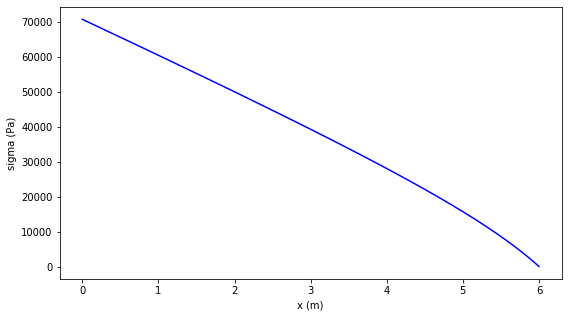

In [ ]:

#Sustituimos los valores numéricos en la expresión de sigma y N y las llamamos de otra manera para conservar la original
sg=sigma.subs([(m,2),(g,9.81),(rho,2000),(a,0.6),(b,0.08),(L,6)])

print("La expresión de la tensión es:")
print("sigma=", sg, " N")


# Representación gráfica
Xmin= 0 ; Xmax=6; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)",
xx=np.zeros((nopto,))
ss=np.zeros((nopto,))

for i in range(0,nopto): 
    xx[i] = Xmin+i*(Xmax-Xmin)/(nopto-1) 
    ss[i] = sg.subs([(x,xx[i])])
    
filename="Nombre de la función"
fig, ax = plt.subplots(1,1,figsize=(9, 5))   
                          # Se genera un objeto figura que definimos a continuación  
    
ax.plot(xx,ss, color="blue")
ax.set_xlabel("x (m)") # Nombre y unidades del eje x
ax.set_ylabel("sigma (Pa)") # Nombre y unidades del eje y

